In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = extract('month', Measurement.date)==6


In [5]:
#  3. Convert the June temperatures to a list.
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(june).all()


In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(results, columns=['date', 'June Temps'])


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = extract('month', Measurement.date)==12


In [9]:
# 7. Convert the December temperatures to a list.
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(december).all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(results, columns=['date', 'December Temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [20]:
dec_sorted_df = dec_temp_df.sort_values(by=['date'])
dec_sorted_df

,date,December Temps
0,2010-12-01,76.0
426,2010-12-01,73.0
604,2010-12-01,72.0
732,2010-12-01,78.0
942,2010-12-01,72.0
...,...,...
1158,2016-12-31,67.0
603,2016-12-31,72.0
209,2016-12-31,66.0
425,2016-12-31,71.0


In [21]:
## Create Plot for average temperature in December by year.
from datetime import datetime
dec_sorted_df['year'] = dec_sorted_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
dec_sorted_df['month'] = dec_sorted_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
dec_sorted_df['day'] = dec_sorted_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)

In [22]:
dec_grouped_df = dec_sorted_df.groupby(['year', 'month']).mean()['December Temps'].reset_index()

Text(0.5, 0, 'Year')

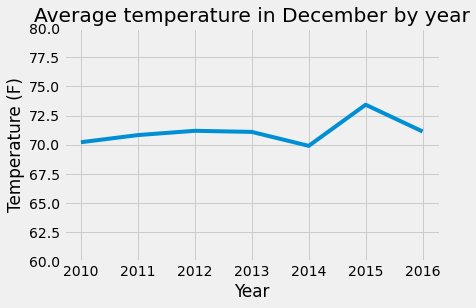

In [23]:
from matplotlib import style
import matplotlib.pyplot as plt
style.use('fivethirtyeight')
plt.plot(
    dec_grouped_df['year'],
    dec_grouped_df['December Temps'],
)
plt.ylim(60, 80)
plt.title('Average temperature in December by year')
plt.ylabel('Temperature (F)')
plt.xlabel('Year')

In [26]:

june_sorted_df = june_temp_df.sort_values(by=['date'])
june_sorted_df


,date,June Temps
0,2010-06-01,78.0
472,2010-06-01,73.0
658,2010-06-01,77.0
806,2010-06-01,69.0
844,2010-06-01,76.0
...,...,...
1311,2017-06-30,76.0
235,2017-06-30,75.0
1075,2017-06-30,75.0
471,2017-06-30,74.0


In [27]:
## Create Plots for average temperature in June by year.
june_sorted_df['year'] = june_sorted_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').year)
june_sorted_df['month'] = june_sorted_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').month)
june_sorted_df['day'] = june_sorted_df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').day)

In [29]:
june_grouped_df = june_sorted_df.groupby(['year', 'month']).mean()['June Temps'].reset_index()

Text(0.5, 0, 'Year')

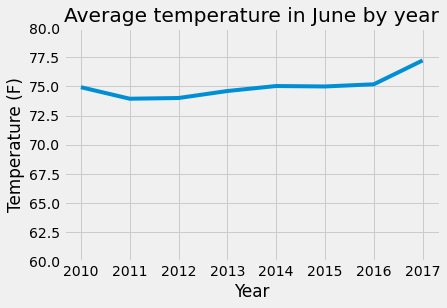

In [31]:

style.use('fivethirtyeight')
plt.plot(
    june_grouped_df['year'],
    june_grouped_df['June Temps'],
)
plt.ylim(60, 80)
plt.title('Average temperature in June by year')
plt.ylabel('Temperature (F)')
plt.xlabel('Year')